<a href="https://colab.research.google.com/github/MahekTrivedi44/AI-Residency-C6/blob/main/Unicorn_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~ Please rerun from the beginning ~

In [ ]:
from IPython.display import display, HTML

display(HTML('''
  <link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
  <div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 30px; color: #c54b8c;">
    Loading the dataset and viewing initial data info.
  </div>
'''))

import pandas as pd

# Load dataset
df = pd.read_csv('https://decodingdatascience.com/wp-content/uploads/2023/02/Unicorn_Companies.csv')

# View initial data info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   float64
 12  Portfolio Exits    49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB
None
      Company Valuation ($B) Date Joined        Country           City  \
0   Bytedance          $140     4/7/2017

In [ ]:
from IPython.display import HTML, display

display(HTML('''
<link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
<div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 25px; color: #915f6d; margin-bottom: 20px;">
  <b>🧼 Cleaning Per Column</b>
</div>

<div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 18px; color: #bc8f8f;">
  <b>Company</b> ➤ Stripped extra spaces<br>
  <b style="color:#e75480;">Valuation ($B)</b> ➤ Removed '$' and converted to <i>float</i><br>
  <b style="color:#d982b5;">Date Joined</b> ➤ Parsed into datetime format<br>
  <b style="color:#dda0dd;">Country & City</b> ➤ Stripped whitespace<br>
  <b style="color:#db7093;">Industry</b> ➤ Standardized casing (e.g., 'FinTech' → 'Fintech')<br>
  <b style="color:#e6a9ec;">Select Investors</b> ➤ Renamed the column & replaced <code>"None"</code> with <span style="color:#c71585;">"Not disclosed"</span><br>
  <b style="color:#de6fa1;">Founded Year</b> ➤ Converted to numeric (int), invalid ones set to NaN<br>
  <b style="color:#f984ef;">Total Raised</b> ➤ Normalized all values to billions (e.g., $400M → 0.4)<br>
  <b style="color:#ec3b83;">Financial Stage</b> ➤ <code>"None"</code> replaced with <span style="color:#f75394;">"Undisclosed"</span>, 'Acq' → 'Acquired'<br>
  <b style="color:#db5f93;">Investors Count / Deal Terms / Portfolio Exits</b> ➤ Converted to <i>integers</i>, missing ones set to 0
</div>
'''))


#Comapny
df['Company'] = df['Company'].str.strip()

#Valuation ($B)
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '').astype(float)

#Date Joined
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')

#Country/City
df[['Country', 'City']] = df[['Country', 'City']].apply(lambda x: x.str.strip())

#Industry
df['Industry'] = df['Industry'].str.title().str.strip()

#Select Investors
df.rename(columns={'Select Inverstors': 'Select Investors'}, inplace=True)
df['Select Investors'] = df['Select Investors'].fillna('Not disclosed')
df['Select Investors'] = df['Select Investors'].replace('None', 'Not disclosed')

#Founded Year
df['Founded Year'] = pd.to_numeric(df['Founded Year'], errors='coerce')

#Total Raised
def parse_raised(val):
    val = val.replace('$', '')
    if 'B' in val:
        return float(val.replace('B', ''))
    elif 'M' in val:
        return float(val.replace('M', '')) / 1000
    else:
        return None
df['Total Raised (B)'] = df['Total Raised'].astype(str).apply(parse_raised)

#Financial Stage
df['Financial Stage'] = df['Financial Stage'].replace({'Acq': 'Acquired'}).fillna('Undisclosed')
df['Financial Stage'] = df['Financial Stage'].replace('None', 'Undisclosed')

#Investors Count, Deal Terms, Portfolio Exits
df['Investors Count'] = pd.to_numeric(df['Investors Count'], errors='coerce').fillna(0).astype(int)
df['Deal Terms'] = pd.to_numeric(df['Deal Terms'], errors='coerce').fillna(0).astype(int)
df['Portfolio Exits'] = pd.to_numeric(df['Portfolio Exits'], errors='coerce').fillna(0).astype(int)

# Check for remaining missing values
print(df.isnull().sum())

# Save cleaned version
df.to_csv('/content/cleaned_startups.csv', index=False)
print("\n")
display(HTML('''
  <link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
  <div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 18px; color: #915f6d;">
    Check cleaned_startups.csv for the cleaned up csv file.
  </div>
'''))


Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Investors     0
Founded Year        43
Total Raised        24
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
Total Raised (B)    28
dtype: int64




#**INTERACTIVE CHART SECTION**


In [8]:
# 🌸 Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, HTML

# 🌸 Custom pastel color palette
# pastel_palette = [
#     "#e6ccff", "#ffcce6", "#ffb3ba", "#cce5ff", "#ffd9b3",
#     "#ccffcc", "#ffe6f0", "#dab6fc", "#f9c6d0", "#d5f4e6"
# ]
# 🌸 Slightly deeper pastel palette
pastel_palette = [
    "#d7aefb", "#f28b82", "#fbbc04", "#a7ffeb", "#cbf0f8",
    "#fbd6f5", "#fdcfe8", "#e6c9a8", "#b5d2ff", "#cbaacb"
]


# 🌸 Set chart theme
sns.set_theme(style="whitegrid", palette=pastel_palette)
plt.rcParams.update({'axes.facecolor': '#fff6fb'})

# 🌸 Load cleaned data
try:
    df = pd.read_csv('cleaned_startups.csv')
except FileNotFoundError:
    print("Error: 'cleaned_startups.csv' not found.")
    df = pd.DataFrame({
        'Company': ['DummyCorp'], 'Valuation ($B)': [100], 'Founded Year': [2015],
        'Select Investors': ['Investor A'], 'Country': ['USA'], 'Industry': ['AI'],
        'City': ['San Francisco'], 'Financial Stage': ['Series D'],
        'Portfolio Exits': [0], 'Total Raised (B)': [1.5]
    })

# 🌸 Custom heading function
def dashboard_heading(text, number):
    display(HTML(f"""
    <link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
    <div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 24px; color: #734f96; margin-top: 30px;">
        <b>{number}. {text}</b>
    </div>
    """))

# 🌸 Custom display box
def dashboard_text(text):
    display(HTML(f"""
    <link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
    <div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 18px; color: #8767a6;">
        {text}
    </div>
    """))

# 1. Highest Valuation
dashboard_heading("Highest Valuation: Which company has the highest valuation?", 1)
top_company = df.loc[df['Valuation ($B)'].idxmax()]
dashboard_text(f"The company with the highest valuation is <b>{top_company['Company']}</b> with a valuation of <b>${top_company['Valuation ($B)']}B</b>.")
top_10_valuation = df.nlargest(10, 'Valuation ($B)')
fig1 = px.bar(top_10_valuation, x='Valuation ($B)', y='Company', orientation='h',
              color='Valuation ($B)', color_continuous_scale=pastel_palette,
              title="Top 10 Most Valuable Unicorn Companies")
fig1.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb", yaxis={'categoryorder':'total ascending'})
fig1.show()


# 2. Missing 'Founded Year'
dashboard_heading("Missing 'Founded Year': How many companies do not have a 'Founded Year' recorded?", 2)
missing_founded = df['Founded Year'].isna().sum()
total_companies = len(df)
dashboard_text(f"There are <b>{missing_founded}</b> companies without a recorded Founded Year.")
missing_data = pd.DataFrame({'Category': ['Recorded', 'Missing'], 'Count': [total_companies - missing_founded, missing_founded]})
fig2 = px.pie(missing_data,
              values='Count', names='Category',
              color_discrete_sequence=["#d7aefb", "#fbd6f5"],  # lavender + lilac
              title="Proportion of Companies with Missing Founded Year")
fig2.update_layout(title_font_color="#e75480", plot_bgcolor="#fff3f9")
fig2.show()

# 3. No Listed Investors
dashboard_heading("No Listed Investors: How many companies have 'Not disclosed' in 'Select Investors'?", 3)
no_investors = (df['Select Investors'] == 'Not disclosed').sum()
dashboard_text(f"<b>{no_investors}</b> companies have no listed investors (marked as 'Not disclosed').")
investor_data = pd.DataFrame({'Category': ['Disclosed', 'Not Disclosed'], 'Count': [total_companies - no_investors, no_investors]})
fig3 = px.pie(investor_data,
              values='Count', names='Category',
              color_discrete_sequence=["#d7aefb", "#fbd6f5"],  # lavender + lilac
              title="Proportion of Companies with Undisclosed Investors")
fig3.update_layout(title_font_color="#e75480", plot_bgcolor="#fff3f9")
fig3.show()

# 4. Most Unicorns by Country
dashboard_heading("Most Unicorns by Country", 4)
top_country = df['Country'].value_counts().idxmax()
dashboard_text(f"The country with the most unicorn companies is <b>{top_country}</b>.")
country_counts = df['Country'].value_counts().head(10).reset_index()
country_counts.columns = ['Country', 'count']
fig4 = px.bar(country_counts, x='Country', y='count', color='Country',
              color_discrete_sequence=pastel_palette, labels={'count': 'Number of Companies'},
              title="Top 10 Countries with Most Unicorns")
fig4.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb")
fig4.show()

# 5. Founded After 2010
dashboard_heading("Companies Founded By Year", 5)
founded_after = df[df['Founded Year'] > 2010].shape[0]
dashboard_text(f"There are <b>{founded_after}</b> companies founded after 2010.")
founded_year_counts = df['Founded Year'].dropna().astype(int).value_counts().reset_index()
founded_year_counts.columns = ['Year', 'Count']
fig5 = px.bar(founded_year_counts, x='Year', y='Count', color='Count',
              color_continuous_scale=pastel_palette, title="Number of Unicorns Founded Each Year")
fig5.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb", xaxis_type='category')
fig5.show()

# 6. Average Valuation by Industry
dashboard_heading("Average Valuation by Industry", 6)
avg_val_by_industry = df.groupby('Industry')['Valuation ($B)'].mean().sort_values(ascending=False).head(10).reset_index()
fig6 = px.bar(avg_val_by_industry, x='Industry', y='Valuation ($B)', color='Valuation ($B)',
              color_continuous_scale=pastel_palette, title="Top 10 Industries by Average Valuation")
fig6.update_layout(title_font_color="#e75480", xaxis_tickangle=-45, plot_bgcolor="#fff6fb")
fig6.show()

# 7. Top 5 Cities with Most Unicorns
dashboard_heading("Top 5 Cities with Most Unicorns", 7)
top_cities = df['City'].value_counts().head(5)
fig7 = px.pie(values=top_cities.values, names=top_cities.index,
              color_discrete_sequence=pastel_palette, title="Top 5 Cities with Most Unicorns")
fig7.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb")
fig7.show()

# 8. Financial Stage Distribution
dashboard_heading("Financial Stage Distribution", 8)
fig8 = px.histogram(df, x='Financial Stage', color='Financial Stage',
                    color_discrete_sequence=pastel_palette, title="Distribution of Financial Stages")
fig8.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb", xaxis={'categoryorder':'total descending'})
fig8.show()

# 9. Most Portfolio Exits
dashboard_heading("Most Portfolio Exits", 9)
most_exits = df.sort_values(by='Portfolio Exits', ascending=False).head(5)
dashboard_text("Top 5 companies with most portfolio exits:")
fig9 = px.bar(most_exits, x='Company', y='Portfolio Exits', color='Portfolio Exits',
              color_continuous_scale=pastel_palette, title="Top 5 Companies by Portfolio Exits")
fig9.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb")
fig9.show()

# 10. Valuation and Total Raised Correlation
dashboard_heading("Valuation and Total Raised Correlation", 10)
df_corr = df[['Valuation ($B)', 'Total Raised (B)']].apply(pd.to_numeric, errors='coerce').dropna()
correlation = df_corr.corr().iloc[0,1]
dashboard_text(f"The correlation between <b>Valuation</b> and <b>Total Raised</b> is <b>{correlation:.2f}</b>.")
fig10 = px.scatter(df, x='Total Raised (B)', y='Valuation ($B)', color='Industry',
                   title="Valuation vs. Total Raised", hover_name='Company',
                   color_discrete_sequence=pastel_palette)
fig10.update_layout(title_font_color="#e75480", plot_bgcolor="#fff6fb")
fig10.show()


#**STATIC CHART SECTION**

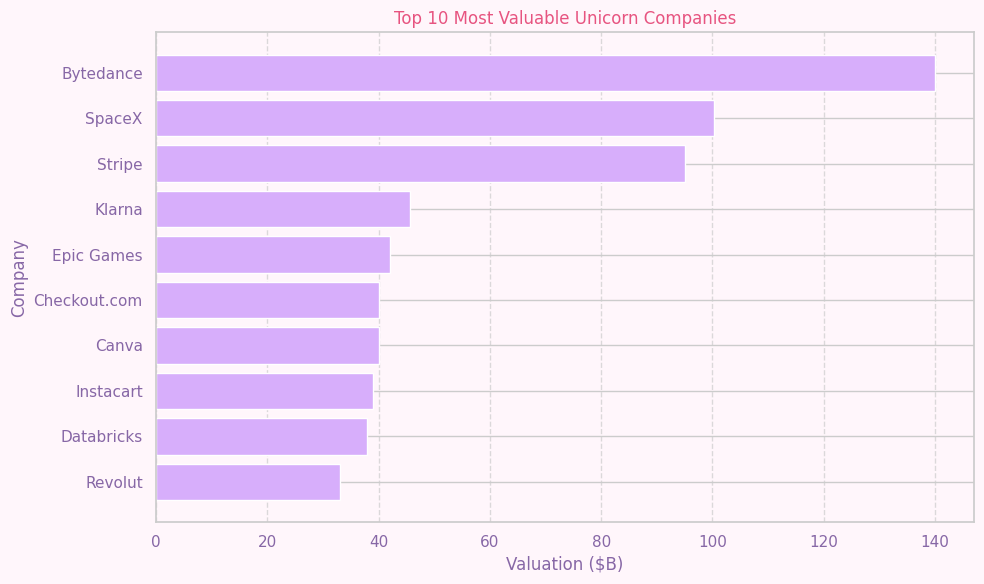

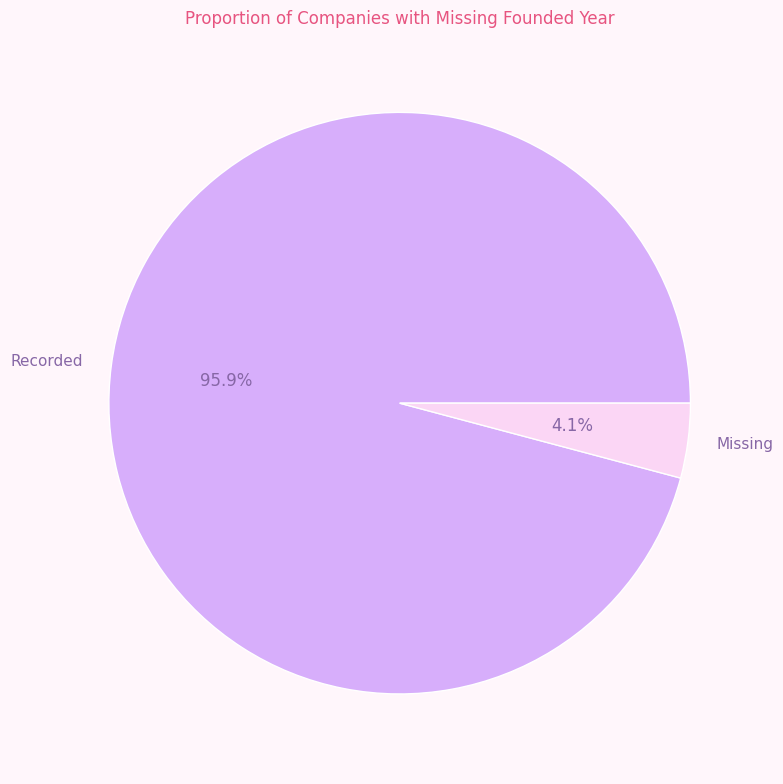

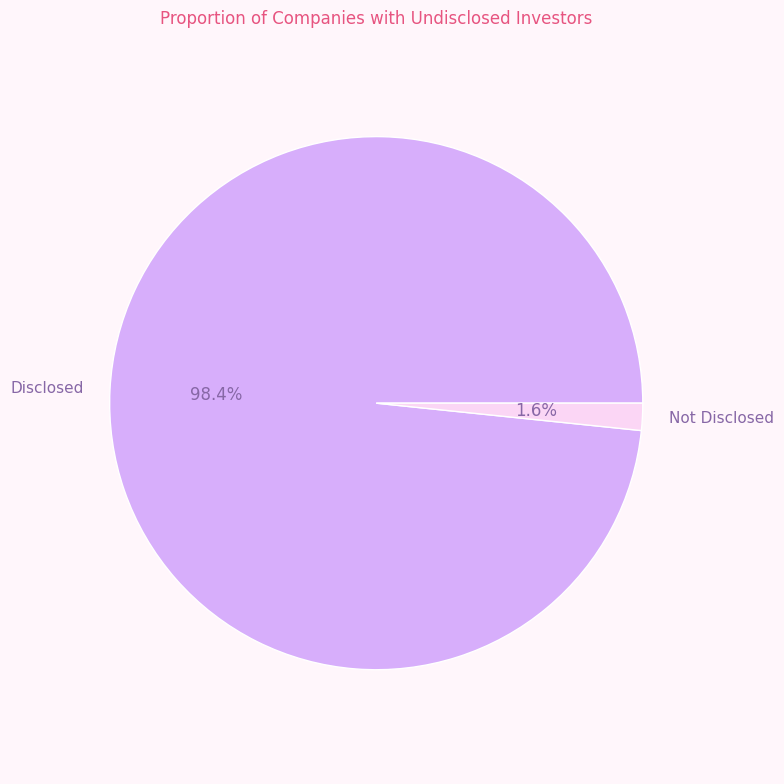

/tmp/ipython-input-16-3652236306.py:116: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




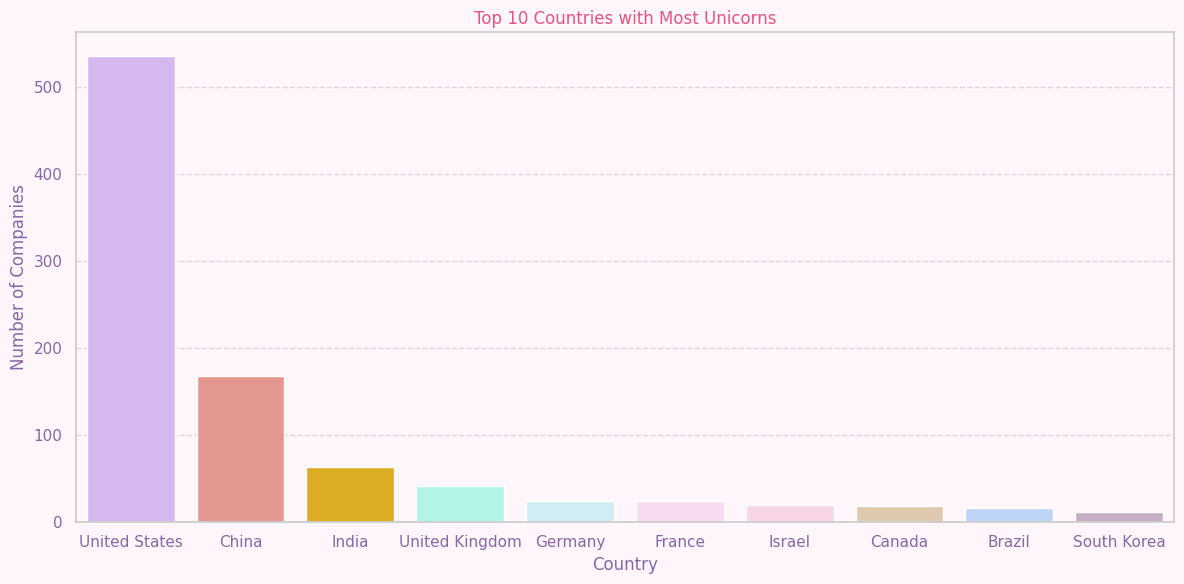

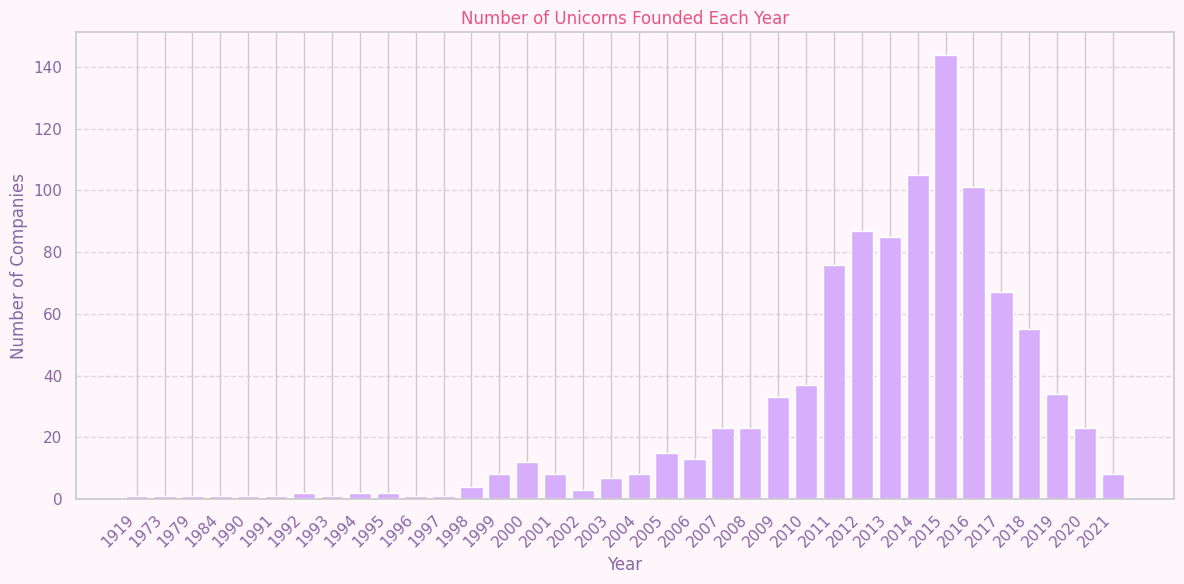

/tmp/ipython-input-16-3652236306.py:146: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




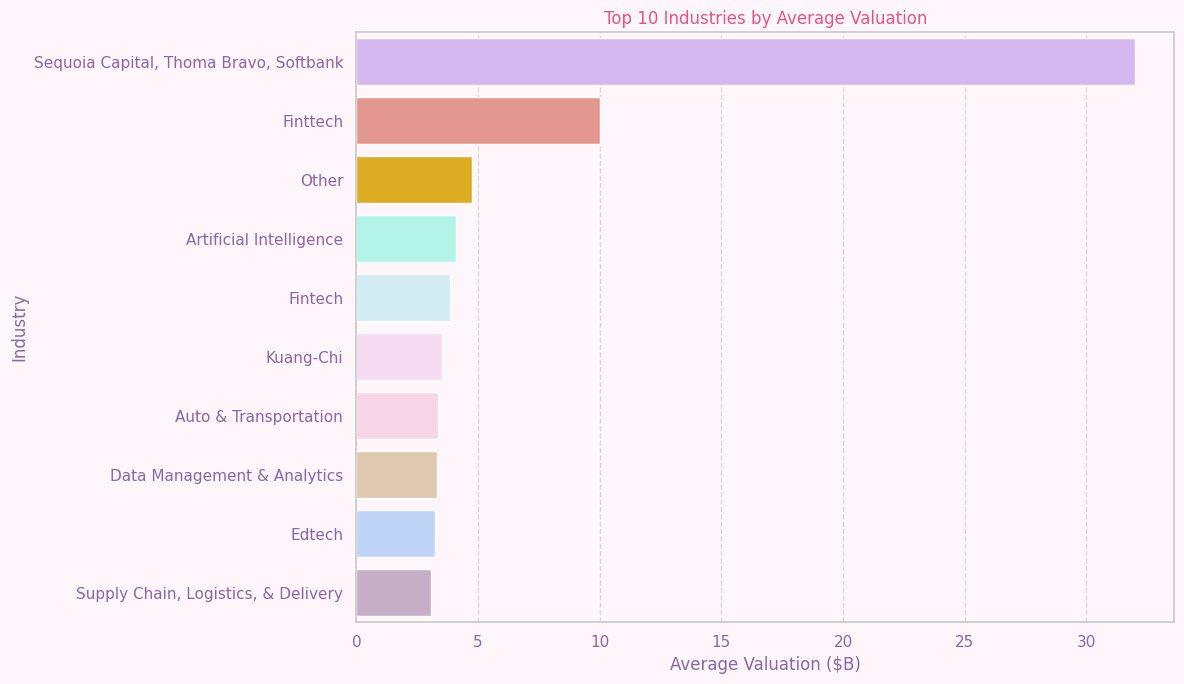

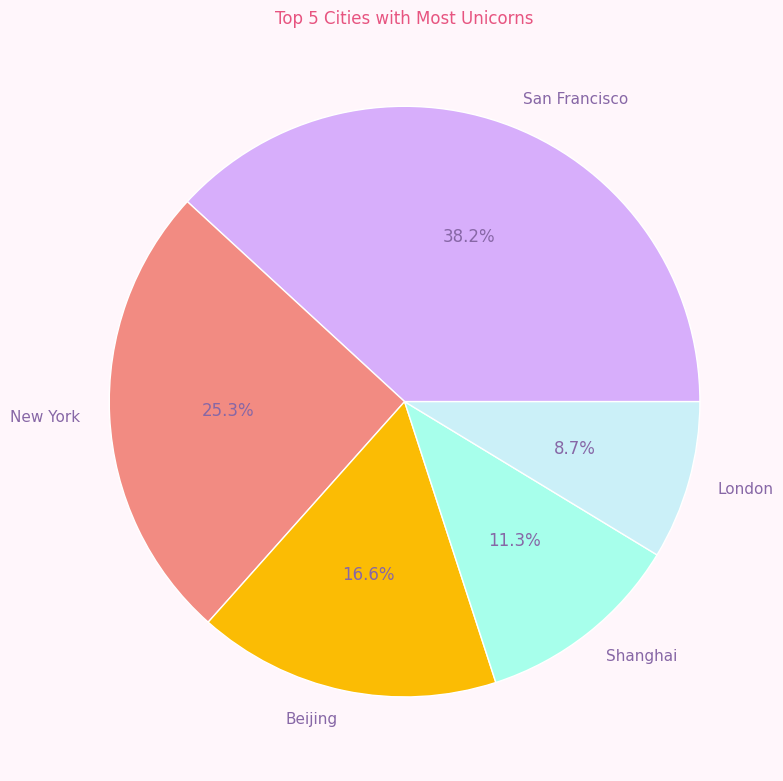

/tmp/ipython-input-16-3652236306.py:172: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-16-3652236306.py:172: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



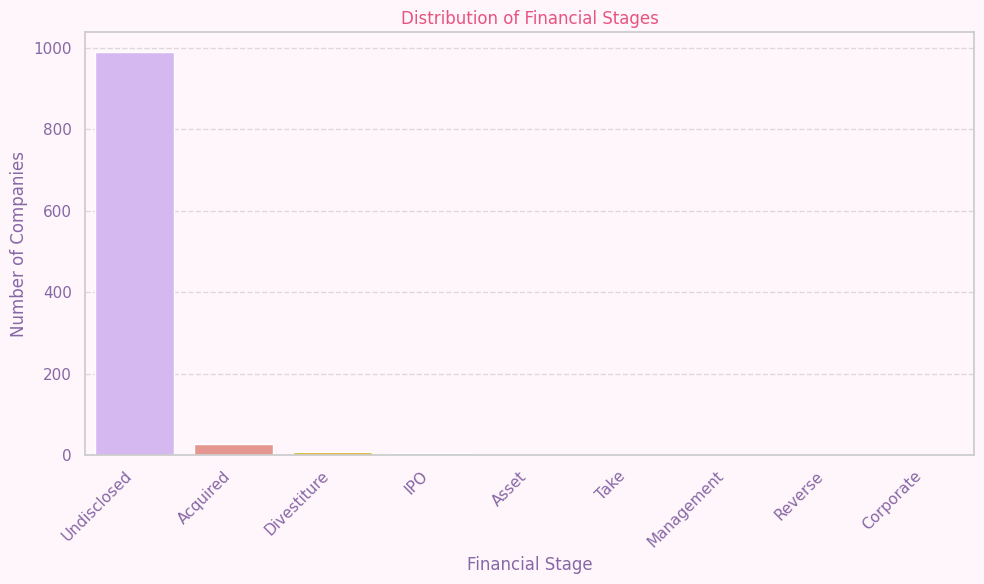

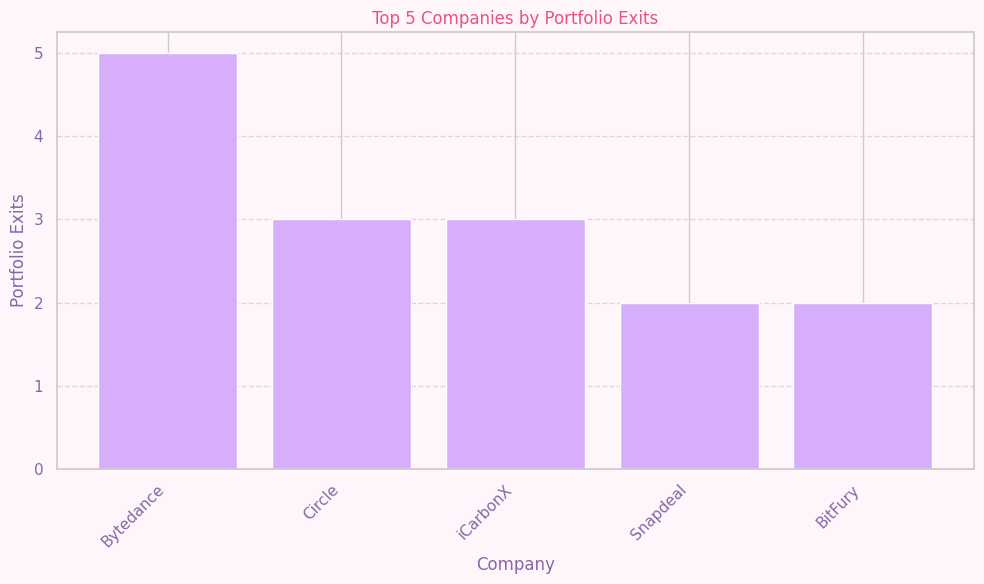

/tmp/ipython-input-16-3652236306.py:203: UserWarning:


The palette list has fewer values (10) than needed (32) and will cycle, which may produce an uninterpretable plot.



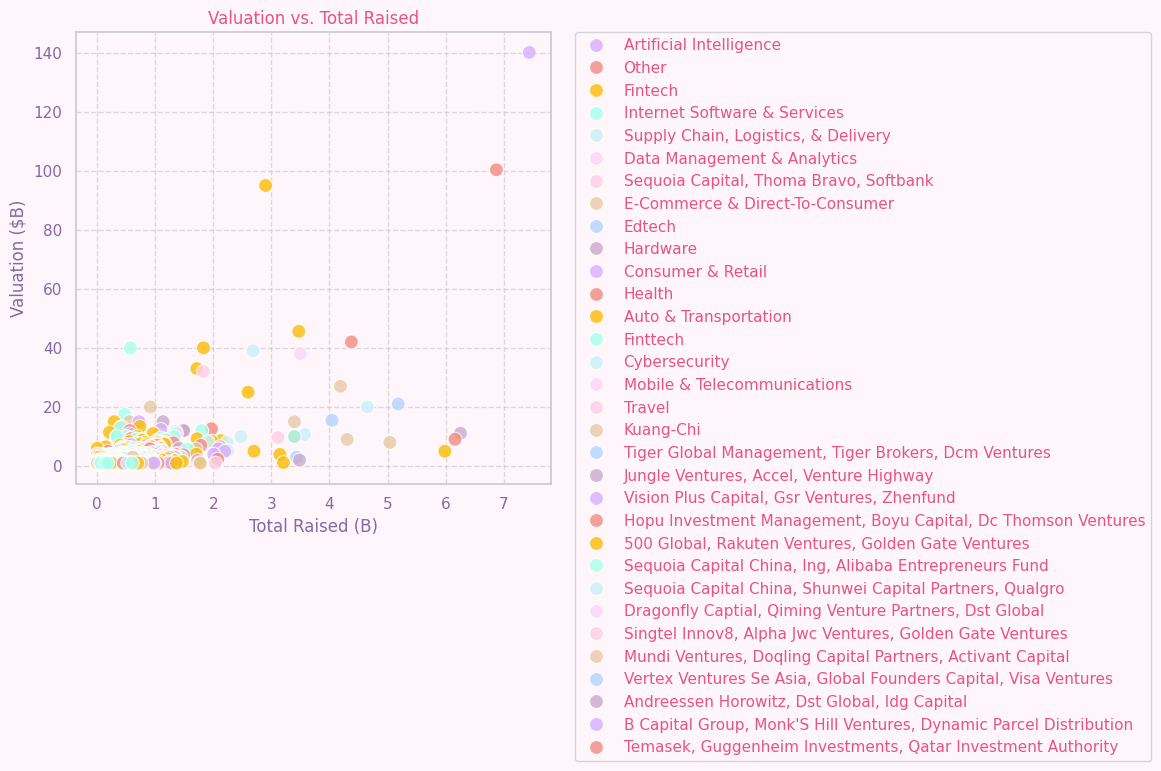

In [16]:
# 🌸 Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# 🌸 Custom pastel color palette
pastel_palette = [
    "#d7aefb", "#f28b82", "#fbbc04", "#a7ffeb", "#cbf0f8",
    "#fbd6f5", "#fdcfe8", "#e6c9a8", "#b5d2ff", "#cbaacb"
]

# 🌸 Set chart theme
sns.set_theme(style="whitegrid", palette=pastel_palette)
plt.rcParams.update({
    'axes.facecolor': '#fff6fb',
    'figure.facecolor': '#fff6fb', # Also set figure facecolor for overall plot area
    'text.color': '#e75480', # Title color
    'axes.labelcolor': '#8767a6', # Axis label color
    'xtick.color': '#8767a6', # X-axis tick color
    'ytick.color': '#8767a6' # Y-axis tick color
})

# 🌸 Load cleaned data
try:
    df = pd.read_csv('cleaned_startups.csv')
except FileNotFoundError:
    print("Error: 'cleaned_startups.csv' not found. Using dummy data.")
    df = pd.DataFrame({
        'Company': ['DummyCorp', 'AnotherCorp', 'ThirdCorp', 'FourthCorp', 'FifthCorp',
                    'SixthCorp', 'SeventhCorp', 'EighthCorp', 'NinthCorp', 'TenthCorp'],
        'Valuation ($B)': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10],
        'Founded Year': [2015, 2012, 2018, 2010, 2016, 2013, 2017, 2011, 2014, 2019],
        'Select Investors': ['Investor A', 'Not disclosed', 'Investor B', 'Investor C', 'Investor A',
                             'Investor D', 'Not disclosed', 'Investor E', 'Investor F', 'Investor G'],
        'Country': ['USA', 'China', 'USA', 'India', 'UK', 'USA', 'Germany', 'USA', 'France', 'Brazil'],
        'Industry': ['AI', 'E-commerce', 'Fintech', 'EdTech', 'Healthcare', 'AI', 'Automotive', 'Fintech', 'Biotech', 'Logistics'],
        'City': ['San Francisco', 'Beijing', 'New York', 'Bangalore', 'London', 'Seattle', 'Berlin', 'Chicago', 'Paris', 'Sao Paulo'],
        'Financial Stage': ['Series D', 'Series C', 'Series B', 'Series A', 'Series D',
                            'Series C', 'Series B', 'Series A', 'Series D', 'Series C'],
        'Portfolio Exits': [0, 1, 0, 0, 2, 0, 0, 1, 0, 0],
        'Total Raised (B)': [1.5, 1.2, 0.8, 0.5, 1.0, 0.7, 0.4, 0.3, 0.6, 0.2]
    })


# 🌸 Custom heading function
def dashboard_heading(text, number):
    display(HTML(f"""
    <link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
    <div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 24px; color: #734f96; margin-top: 30px;">
        <b>{number}. {text}</b>
    </div>
    """))

# 🌸 Custom display box
def dashboard_text(text):
    display(HTML(f"""
    <link href="https://fonts.googleapis.com/css2?family=Love+Ya+Like+A+Sister&display=swap" rel="stylesheet">
    <div style="font-family: 'Love Ya Like A Sister', cursive; font-size: 18px; color: #8767a6;">
        {text}
    </div>
    """))

# 1. Highest Valuation
dashboard_heading("Highest Valuation: Which company has the highest valuation?", 1)
top_company = df.loc[df['Valuation ($B)'].idxmax()]
dashboard_text(f"The company with the highest valuation is <b>{top_company['Company']}</b> with a valuation of <b>${top_company['Valuation ($B)']}B</b>.")
top_10_valuation = df.nlargest(10, 'Valuation ($B)').sort_values(by='Valuation ($B)', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_10_valuation['Company'], top_10_valuation['Valuation ($B)'], color=pastel_palette[0])
plt.xlabel("Valuation ($B)", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Company", color=plt.rcParams['axes.labelcolor'])
plt.title("Top 10 Most Valuable Unicorn Companies", color=plt.rcParams['text.color'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Missing 'Founded Year'
dashboard_heading("Missing 'Founded Year': How many companies do not have a 'Founded Year' recorded?", 2)
missing_founded = df['Founded Year'].isna().sum()
total_companies = len(df)
dashboard_text(f"There are <b>{missing_founded}</b> companies without a recorded Founded Year.")
missing_data = pd.DataFrame({'Category': ['Recorded', 'Missing'], 'Count': [total_companies - missing_founded, missing_founded]})

plt.figure(figsize=(8, 8))
plt.pie(missing_data['Count'], labels=missing_data['Category'], autopct='%1.1f%%', colors=[pastel_palette[0], pastel_palette[5]],
        textprops={'color': plt.rcParams['axes.labelcolor']})
plt.title("Proportion of Companies with Missing Founded Year", color=plt.rcParams['text.color'])
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# 3. No Listed Investors
dashboard_heading("No Listed Investors: How many companies have 'Not disclosed' in 'Select Investors'?", 3)
no_investors = (df['Select Investors'] == 'Not disclosed').sum()
dashboard_text(f"<b>{no_investors}</b> companies have no listed investors (marked as 'Not disclosed').")
investor_data = pd.DataFrame({'Category': ['Disclosed', 'Not Disclosed'], 'Count': [total_companies - no_investors, no_investors]})

plt.figure(figsize=(8, 8))
plt.pie(investor_data['Count'], labels=investor_data['Category'], autopct='%1.1f%%', colors=[pastel_palette[0], pastel_palette[5]],
        textprops={'color': plt.rcParams['axes.labelcolor']})
plt.title("Proportion of Companies with Undisclosed Investors", color=plt.rcParams['text.color'])
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Most Unicorns by Country
dashboard_heading("Most Unicorns by Country", 4)
top_country = df['Country'].value_counts().idxmax()
dashboard_text(f"The country with the most unicorn companies is <b>{top_country}</b>.")
country_counts = df['Country'].value_counts().head(10).reset_index()
country_counts.columns = ['Country', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='count', data=country_counts, palette=pastel_palette)
plt.xlabel("Country", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Number of Companies", color=plt.rcParams['axes.labelcolor'])
plt.title("Top 10 Countries with Most Unicorns", color=plt.rcParams['text.color'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Founded After 2010
dashboard_heading("Companies Founded By Year", 5)
founded_after = df[df['Founded Year'] > 2010].shape[0]
dashboard_text(f"There are <b>{founded_after}</b> companies founded after 2010.")
founded_year_counts = df['Founded Year'].dropna().astype(int).value_counts().sort_index().reset_index()
founded_year_counts.columns = ['Year', 'Count']

plt.figure(figsize=(12, 6))
plt.bar(founded_year_counts['Year'].astype(str), founded_year_counts['Count'], color=pastel_palette[0])
plt.xlabel("Year", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Number of Companies", color=plt.rcParams['axes.labelcolor'])
plt.title("Number of Unicorns Founded Each Year", color=plt.rcParams['text.color'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Average Valuation by Industry
dashboard_heading("Average Valuation by Industry", 6)
avg_val_by_industry = df.groupby('Industry')['Valuation ($B)'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Valuation ($B)', y='Industry', data=avg_val_by_industry, palette=pastel_palette)
plt.xlabel("Average Valuation ($B)", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Industry", color=plt.rcParams['axes.labelcolor'])
plt.title("Top 10 Industries by Average Valuation", color=plt.rcParams['text.color'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Top 5 Cities with Most Unicorns
dashboard_heading("Top 5 Cities with Most Unicorns", 7)
top_cities = df['City'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_cities.values, labels=top_cities.index, autopct='%1.1f%%', colors=pastel_palette[:len(top_cities)],
        textprops={'color': plt.rcParams['axes.labelcolor']})
plt.title("Top 5 Cities with Most Unicorns", color=plt.rcParams['text.color'])
plt.axis('equal')
plt.tight_layout()
plt.show()

# 8. Financial Stage Distribution
dashboard_heading("Financial Stage Distribution", 8)
financial_stage_counts = df['Financial Stage'].value_counts().sort_values(ascending=False).reset_index()
financial_stage_counts.columns = ['Financial Stage', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Financial Stage', y='Count', data=financial_stage_counts, palette=pastel_palette)
plt.xlabel("Financial Stage", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Number of Companies", color=plt.rcParams['axes.labelcolor'])
plt.title("Distribution of Financial Stages", color=plt.rcParams['text.color'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 9. Most Portfolio Exits
dashboard_heading("Most Portfolio Exits", 9)
most_exits = df.sort_values(by='Portfolio Exits', ascending=False).head(5)
dashboard_text("Top 5 companies with most portfolio exits:")

plt.figure(figsize=(10, 6))
plt.bar(most_exits['Company'], most_exits['Portfolio Exits'], color=pastel_palette[0])
plt.xlabel("Company", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Portfolio Exits", color=plt.rcParams['axes.labelcolor'])
plt.title("Top 5 Companies by Portfolio Exits", color=plt.rcParams['text.color'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 10. Valuation and Total Raised Correlation
dashboard_heading("Valuation and Total Raised Correlation", 10)
df_corr = df[['Valuation ($B)', 'Total Raised (B)']].apply(pd.to_numeric, errors='coerce').dropna()
correlation = df_corr.corr().iloc[0,1]
dashboard_text(f"The correlation between <b>Valuation</b> and <b>Total Raised</b> is <b>{correlation:.2f}</b>.")

plt.figure(figsize=(12, 7))
sns.scatterplot(x='Total Raised (B)', y='Valuation ($B)', hue='Industry', data=df, palette=pastel_palette, s=100, alpha=0.8)
plt.xlabel("Total Raised (B)", color=plt.rcParams['axes.labelcolor'])
plt.ylabel("Valuation ($B)", color=plt.rcParams['axes.labelcolor'])
plt.title("Valuation vs. Total Raised", color=plt.rcParams['text.color'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()